In [5]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # to split dataset
from sklearn.linear_model import LinearRegression
df  = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
print("shape :",df.shape)
df.info()
print('-------------=============================================------------------')
print(df.describe())

shape : (200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
-------------=============================================------------------
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


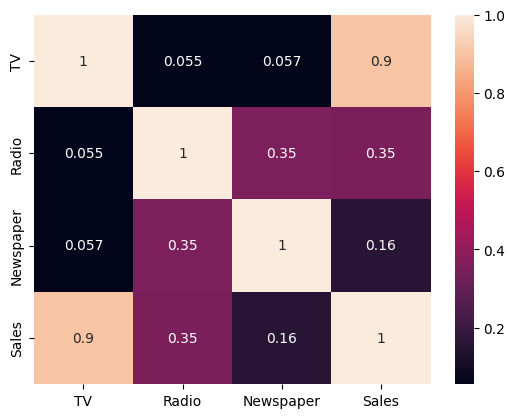

In [7]:
dataplot = sns.heatmap(df.corr(), annot=True)


In [8]:
x = df.drop('Sales',axis=1)
y = df['Sales']
# converting to numpy array
x = np.array(x)
y = np.array(y)

# creating function for normalization of data
def norm(x):
    meanX = np.mean(x)
    m = np.max(x)
    n = np.min(x)
    x= (x-meanX)/(m-n)
    return x

# creating function for Standardisation of data
def stand(x):
    x = (x-np.mean(x))/np.std(x)
    return x

x = stand(x)
y = stand(y)
print(x.shape,y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
print(f"Size of Train set: {y_train.shape[0]}")
print(f"Size of Test set: {x_test.shape[0]}")

(200, 3) (200,)
Size of Train set: 140
Size of Test set: 60


iteration:  0 current cost : 1.0281150585911458 current weight: [0.19573253 0.01904836 0.01492665] bias : -0.010725128810655725
iteration:  1 current cost : 0.7140264811073166 current weight: [0.30908311 0.05630479 0.04453637] bias : -0.054340115127635334
iteration:  2 current cost : 0.5616831526541691 current weight: [0.38692151 0.09668711 0.07619435] bias : -0.10451451252739635
iteration:  3 current cost : 0.4577911376405934 current weight: [0.4470353  0.13516049 0.10573279] bias : -0.15237206974781464
iteration:  4 current cost : 0.380721088842862 current weight: [0.49652883 0.17028848 0.13201004] bias : -0.19529841126211062
iteration:  5 current cost : 0.3226132099060654 current weight: [0.53853449 0.20189283 0.15493701] bias : -0.2328781921185532
iteration:  6 current cost : 0.2786551411517769 current weight: [0.57466708 0.23020824 0.17476507] bias : -0.2654264403002849
iteration:  7 current cost : 0.2453614487805461 current weight: [0.60592667 0.25558057 0.19183239] bias : -0.293

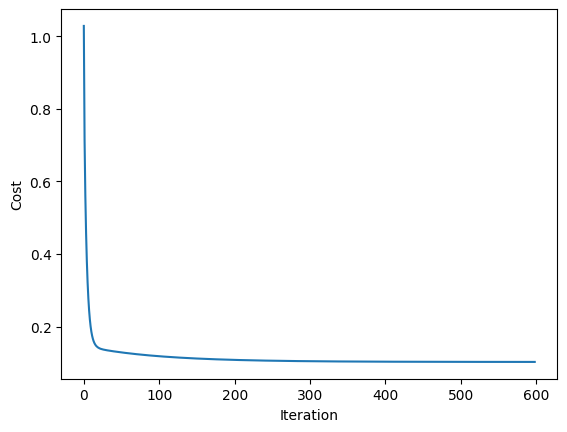

In [9]:
# creating linearRegression Function
def linearRegression(x,y,iterations  = 1000 ,learning_rate = 0.001,stopping = 1e-6):
    # giving initial values to weight and bias
    m = np.zeros(x.shape[1])   #weight
    c = 0                      #bias

    n = float(len(x))
    costs = []
    weights  = []
    bias =[]
    previous_cost  = 0
    for i in range(iterations):
        # calculating y
        Yp = np.dot(x , m) + c
        # calculating cost
        cost = (np.square(np.subtract(y,Yp)).mean())
        costs.append(cost)

        weights.append(m)
        bias.append(c)
        if i > 0:
            if np.abs(cost - previous_cost) < stopping:
                break

        # calculating derivative
        weight_derivative = (2/n) *np.dot(x.T , (Yp-y))
        bias_derivative = (2/n) * sum(Yp-y)
        # modifying weight and bias
        m = m - (learning_rate * weight_derivative)
        c = c - (learning_rate * bias_derivative)
        previous_cost = cost
        print('iteration: ',i,'current cost :',cost,'current weight:',m,'bias :',c)
    plt.plot(costs)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
    # returning last weight and bias
    return m,c

m,c = linearRegression(x_train,y_train,learning_rate = 0.1,iterations = 1000)



In [10]:
y_pred = np.dot(m,x_test.T) + c

from sklearn.metrics import mean_absolute_error
m = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
print("mse:     ",m)
print("r2_score:",r)

mse:      0.22877358969346784
r2_score: 0.9062394305298411


In [11]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)
model.score(x_test, y_test)
y_pred = model.predict(x_test)
m = mean_absolute_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print("mse:     ",m)
print("r2_score:",r)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

mse:      0.2266775623001647
r2_score: 0.9071151423684273
intercept: -0.004272190875330539
slope: [ 0.80127987  1.49279121 -0.02194706]
